**SOBRE O DATASET**  

**Análise do Mercado de Trabalho e Salários em IA 2025**  
Este conjunto de dados abrangente contém informações detalhadas sobre vagas de trabalho em inteligência artificial e aprendizado de máquina, faixas salariais e tendências de mercado em diferentes países, níveis de experiência e portes de empresas. Perfeito para entusiastas de ciência de dados, pesquisadores de carreira e analistas de mercado.

**Título do Conjunto de Dados**  
Tendências Globais do Mercado de Trabalho e Salários em IA 2025: Análise Completa de Mais de 15.000 Vagas

**Descrição do Conjunto de Dados**  
Este conjunto de dados oferece uma análise extensa do mercado de trabalho em inteligência artificial, com mais de 15.000 vagas reais coletadas em grandes plataformas de emprego ao redor do mundo. Inclui informações detalhadas sobre salários, requisitos das vagas, perfil das empresas e tendências geográficas.

**Principais Características:**
* Mais de 15.000 vagas de emprego em mais de 50 países;
* Dados salariais em múltiplas moedas (normalizados para USD);
* Classificação por nível de experiência (Júnior, Pleno, Sênior, Executivo);
* Análise do impacto do porte da empresa;
* Tendências e padrões de trabalho remoto;
* Análise de demanda por habilidades;
* Variações geográficas nas faixas salariais;
* Série temporal mostrando a evolução do mercado.

**Variáveis**  
- **job\_id**: Identificador único para cada anúncio de vaga;  
- **job\_title**: Título padronizado da vaga;  
- **salary\_usd**: Salário anual em USD;  
- **salary\_currency**: Moeda original do salário;  
- **experience\_level**: Nível de experiência: EN (Iniciante), MI (Intermediário), SE (Sênior), EX (Executivo);  
- **employment\_type**: Tipo de emprego: FT (Tempo integral), PT (Meio período), CT (Contrato), FL (Freelance);  
- **company\_location**: País onde a empresa está localizada;  
- **company\_size**: Tamanho da empresa: S (< 50 funcionários), M (50–250 funcionários), L (> 250 funcionários);  
- **employee\_residence**: País onde o colaborador reside;  
- **remote\_ratio**: Percentual de trabalho remoto: 0 (Nenhum), 50 (Híbrido), 100 (Totalmente remoto);  
- **required_skills:** As 5 principais habilidades necessárias (separadas por vírgula);  
- **education_required**: Requisito mínimo de educação;  
- **years_experience:** Anos de experiência necessários;  
- **industry:** Setor de atuação da empresa;  
- **posting_date**: Data em que o trabalho foi publicado;  
- **application_deadline:** Prazo final para inscrição;  
- **job_description_length:** Contagem de caracteres da descrição do cargo;  
- **benefits_score**: Pontuação numérica do pacote de benefícios (1-10);  
- **company_name:**  Nome da empresa.

******Texto adaptado da publicação original do publicador do dataset no [Kaggle](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025).

In [1]:
# Bibliotecas não instaladas no colab
%pip install -q scikit-posthocs statannotations

In [2]:
# Data manipulation and analysis library
import pandas as pd

In [3]:
# Increase the number of displayed columns in Pandas output
pd.set_option('display.max_columns', None)

# PREPARATION, ORGANIZATION, AND STRUCTURING OF DATA

1\) Getting to Know the Dataset  
Inicialmente, podemos verificar o conjunto de dados.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data_analytics/ai_job_dataset.csv')

df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
len(df.company_name.value_counts())

16

In [6]:
df.shape

(15000, 19)

2\) Null values

In [7]:
df.isna().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


# EXPLORATORY DATA ANALYSIS (EDA)
Uma análise visual de determinadas variáveis, relações pode ser feita no aplicativo streamlit.

# CORRELATION
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.

## Preprocessing
1\. Label encoding

In [8]:
# Dataframe para o label encoding
df_encoded = df.copy()

In [9]:
# Mapeamentos com base na hierarquia
experience_level_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
company_size_map = {'S': 1, 'M': 2, 'L': 3}
education_required_map = {'Associate': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}

In [10]:
features_map = ['experience_level', 'company_size', 'education_required']

In [11]:
# Aplicando o mapeamento às colunas
for i in features_map:
    df_encoded[i] = df_encoded[i].map(eval(i + '_map')).astype('int8')

2\. Feature Engineering

In [12]:
df_encoded['posting_date'] = pd.to_datetime(df_encoded['posting_date'])
df_encoded['application_deadline'] = pd.to_datetime(df_encoded['application_deadline'])

In [13]:
df_encoded['closing_time'] = (df_encoded['application_deadline'] - df_encoded['posting_date']).dt.days

df_encoded.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,closing_time
0,AI00001,AI Research Scientist,90376,USD,3,CT,China,2,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",2,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,20
1,AI00002,AI Software Engineer,61895,USD,1,CT,Canada,2,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",3,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,52
2,AI00003,AI Specialist,152626,USD,2,FL,Switzerland,3,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",1,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,20
3,AI00004,NLP Engineer,80215,USD,3,FL,India,2,India,50,"Scala, SQL, Linux, Python",4,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,63
4,AI00005,AI Consultant,54624,EUR,1,PT,France,1,Singapore,100,"MLOps, Java, Tableau, Python",3,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,69


## Guidelines
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\) Measurement scale  
As variáveis devem ser medidas em uma escala intervalar ou de razão.

In [14]:
# Capturar apenas colunas numéricas de df
df_num = df_encoded.select_dtypes(include=['number'])

In [15]:
df_num.dtypes

,0
salary_usd,int64
experience_level,int8
company_size,int8
remote_ratio,int64
education_required,int8
years_experience,int64
job_description_length,int64
benefits_score,float64
closing_time,int64


2\) Functional independence  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\) Relationship between the variables  
As variáveis devem possuir relação linear.

In [16]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Setting a light background theme
sns.set_theme(style='whitegrid')

plt.rcParams.update({
    'text.color': 'gray',             # text color
    'axes.labelcolor': 'gray',        # axis label color
    'axes.edgecolor': 'gray',         # axis border color
    'xtick.color': 'gray',            # x-axis tick color
    'ytick.color': 'gray',            # y-axis tick color
    'axes.titlecolor': 'gray',        # axis title color
    'axes.edgecolor': 'lightgray',    # axis border color
    'axes.facecolor': 'white',        # axis background color
    'figure.facecolor': 'white',      # figure background color
    'figure.edgecolor': 'white'
    })

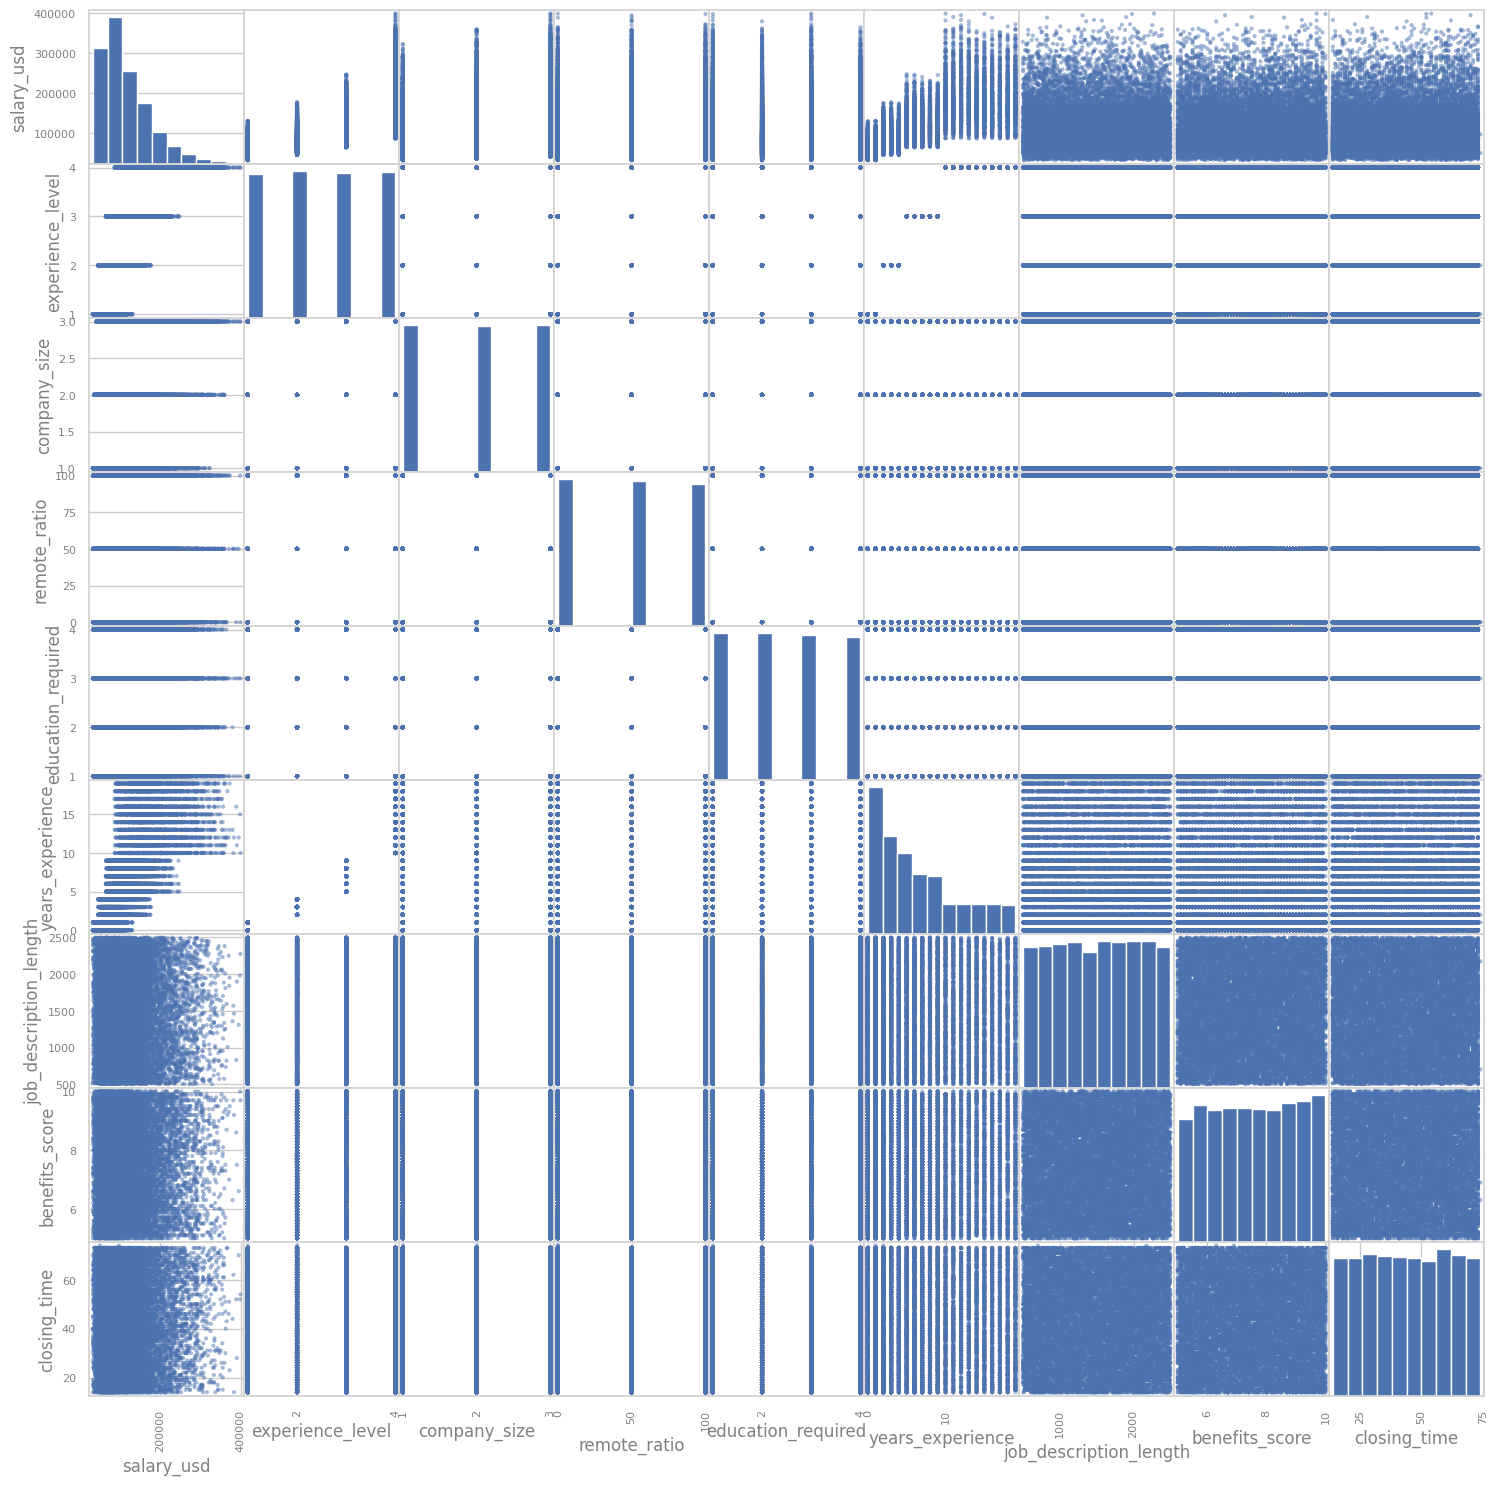

In [18]:
scatter_matrix(df_num, alpha=0.5, figsize=(18, 18));

4\) Normality  
As distribuições das variáveis devem ser normais (ou aproximadamente).

**QQ-PLOT**  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [19]:
from scipy import stats

In [20]:
def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=ax[i])
        ax[i].set_title(f"QQ-plot de {column}")

    # remove possible "empty" subplots
    for j in range(len(df.columns), len(ax)):
        fig.delaxes(ax[j])

    return plt.tight_layout()

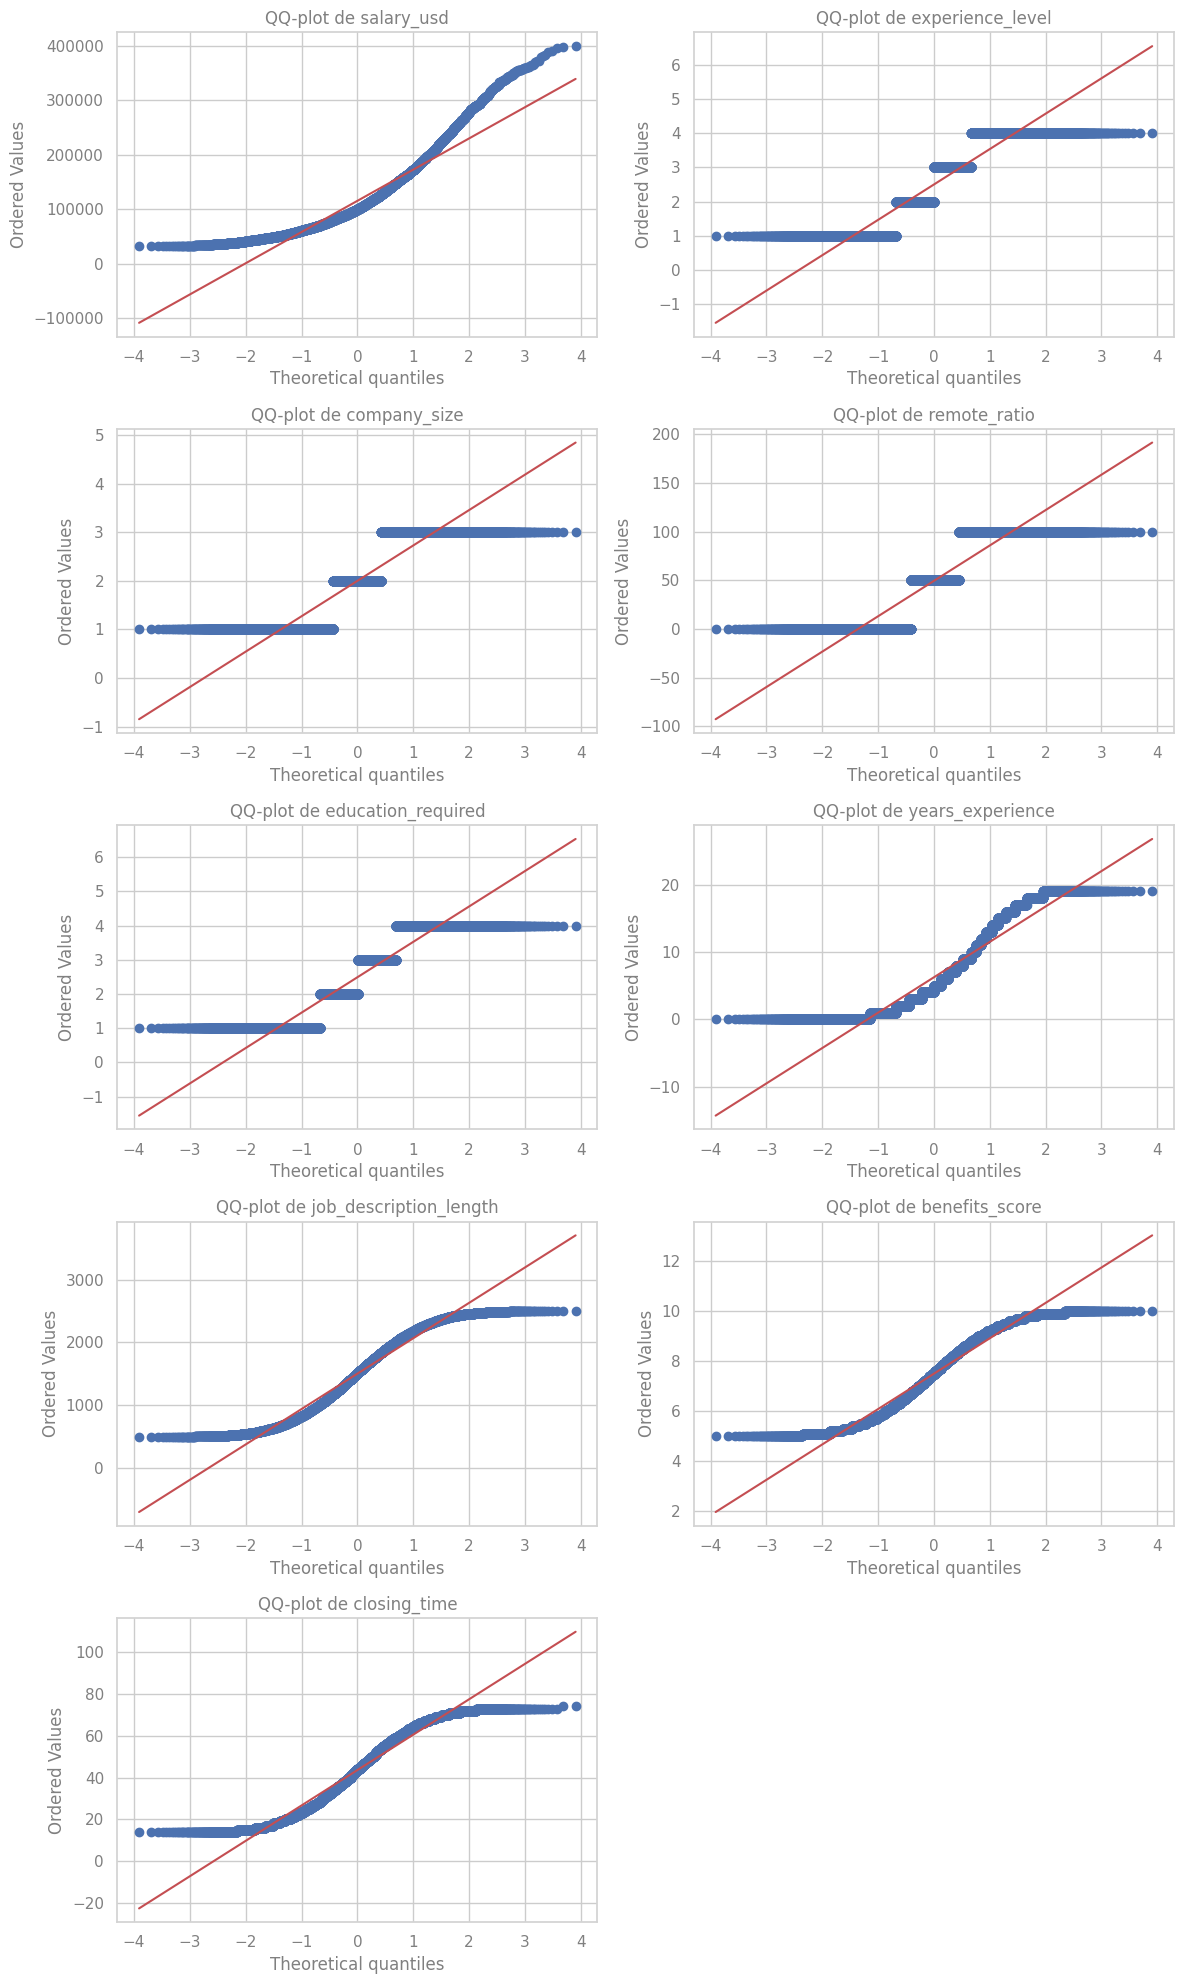

In [21]:
qq_subplots(df_num)

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [22]:
from statsmodels.stats.diagnostic import lilliefors
import warnings


def normality_tests(df):
    results = []

    # Captura avisos e aplica filtros
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is .*",
            category=UserWarning,
            module='scipy.stats._axis_nan_policy'
        )

        # Executa os testes de normalidade
        for i in df.columns:
            # O aviso de Shapiro será ignorado aqui
            shapiro = stats.shapiro(df[i])[1]
            lillie = lilliefors(df[i], dist="norm")[1]
            jarque = stats.jarque_bera(df[i])[1]
            anderson = stats.anderson(df[i], dist="norm")[1][2] # alpha = 0.05

            results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                            "JARQUE": jarque, "ANDERSON": anderson})

    # Retorna o DataFrame com os resultados
    return pd.DataFrame(results, index=df.columns)

In [23]:
normality_tests(df_num)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
salary_usd,1.722784e-70,0.001,0.000000e+00,0.787
experience_level,1.992027e-78,0.001,1.214280e-250,0.787
company_size,1.058325e-86,0.001,2.144892e-306,0.787
remote_ratio,1.095536e-86,0.001,8.751973e-306,0.787
education_required,2.167819e-78,0.001,6.989108e-250,0.787
years_experience,6.599085e-72,0.001,0.000000e+00,0.787
job_description_length,7.474712e-55,0.001,1.407738e-195,0.787
benefits_score,1.390940e-55,0.001,3.769652e-199,0.787
closing_time,1.547471e-55,0.001,6.825137e-199,0.787


## Spearman's Rho
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Strength and direction  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| COEFICIENTE | GRAU |
| - | - |
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 0,8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±0,2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Inexistente |

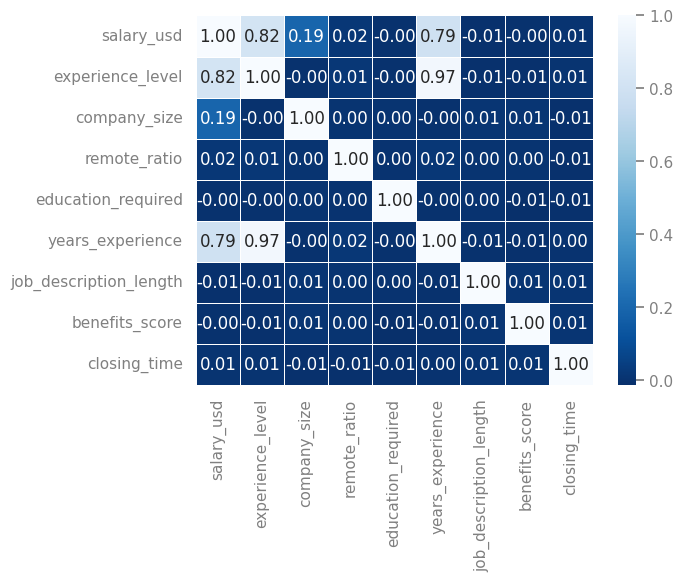

In [24]:
sns.heatmap(df_num.corr(method='spearman'), annot=True, fmt='.2f',
            cmap='Blues_r', linewidths=0.5);

2\) Statistical significance  
Descreve se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>**: Há correlação significativa entre as variáveis.

In [25]:
cols_sig = [i for i in df_num.columns if i != 'salary_usd']

In [26]:
p_values = []

for i in cols_sig:
    estat, p_value = stats.spearmanr(df_num['salary_usd'], df_num[i])
    p_values.append(p_value)

pd.DataFrame({'p-value': p_values}, index=cols_sig)

,p-value
experience_level,0.000000e+00
company_size,5.855911e-127
remote_ratio,4.212671e-02
education_required,8.289956e-01
years_experience,0.000000e+00
job_description_length,4.233832e-01
benefits_score,5.536882e-01
closing_time,5.353529e-01


# HYPOTHESIS TESTING

1\) Teste de Kruskal-Wallis  
Teste não-paramétrico para comparar mais de dois grupos independentes.

Critérios:
- **Nível de significância (α)**: 0,05.

Hipóteses:
- **H<sub>0</sub>**: Todas as populações (grupos) têm a mesma distribuição de salário;
- **H<sub>1</sub>**: Pelo menos um grupo difere em distribuição.

In [27]:
groups_exp = df_num['experience_level']

In [28]:
# Cada item será a série de salary_usd para um nível de experiência diferente
groups = [df_num[groups_exp == i]['salary_usd'] for i in groups_exp.unique()]

In [29]:
stats.kruskal(*groups)

KruskalResult(statistic=np.float64(10005.186508411563), pvalue=np.float64(0.0))

2\) Teste post-hoc de Dunn com ajuste de Bonferroni  
Calcula exatamente quais pares de níveis diferem.

In [30]:
import scikit_posthocs as sp

In [31]:
sp.posthoc_dunn(df_num, val_col='salary_usd', p_adjust='bonferroni',
                group_col='experience_level')

,1,2,3,4
1,1.000000e+00,1.558675e-182,0.000000e+00,0.000000e+00
2,1.558675e-182,1.000000e+00,1.316802e-228,0.000000e+00
3,0.000000e+00,1.316802e-228,1.000000e+00,4.393850e-246
4,0.000000e+00,0.000000e+00,4.393850e-246,1.000000e+00


3\) Visualização das diferenças  
Boxplot do salário por nível de experiência, com anotações de significância para cada comparação.

In [32]:
from statannotations.Annotator import Annotator

In [33]:
# Definir os pares
pairs = [
    (1, 2),  # ENTRY vs MID
    (1, 3),  # ENTRY vs SENIOR
    (1, 4),  # ENTRY vs EXECUTIVE
    (2, 3),  # MID vs SENIOR
    (2, 4),  # MID vs EXECUTIVE
    (3, 4)   # SENIOR vs EXECUTIVE
]

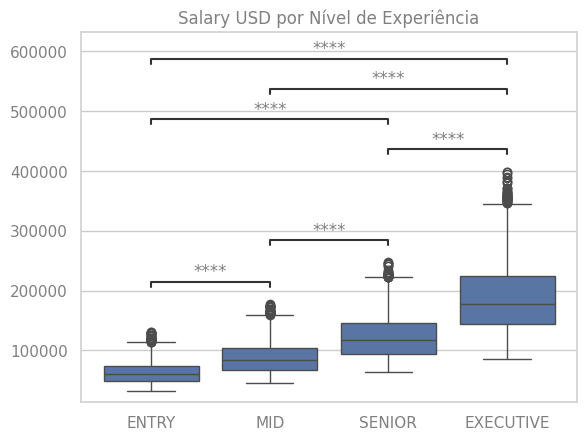

In [34]:
ax = sns.boxplot(x='experience_level', y='salary_usd', data=df_num)

annotator = Annotator(ax, pairs, data=df_num, x='experience_level', y='salary_usd')
annotator.configure(test=None, text_format='star', loc='inside', verbose=0)
annotator.set_pvalues([1e-182, 1e-300, 1e-300, 1e-228, 1e-300, 1e-246])
annotator.annotate()

plt.title('Salary USD por Nível de Experiência')
plt.ylabel('')
plt.xlabel('')
plt.xticks([0, 1, 2, 3], ['ENTRY', 'MID', 'SENIOR', 'EXECUTIVE']);

# REGRESSION

## Preprocessing
1\) One-Hot Encoding

In [35]:
df_reg = df_encoded.copy().query('job_title == "Data Analyst"')

In [36]:
cols_one_hot = ['industry', 'employment_type', 'company_location']

In [37]:
df_reg = pd.get_dummies(df_reg, columns=cols_one_hot, drop_first=True)

In [38]:
for i in df_reg.columns:
    if ('industry' in i) or ('employment_type' in i) or ('company_loc' in i):
        df_reg[i] = df_reg[i].astype('int8')

In [39]:
df_reg = df_reg.select_dtypes(include=['number'])

df_reg.head(1)

,salary_usd,experience_level,company_size,remote_ratio,education_required,years_experience,job_description_length,benefits_score,closing_time,industry_Consulting,industry_Education,industry_Energy,industry_Finance,industry_Gaming,industry_Government,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation,employment_type_FL,employment_type_FT,employment_type_PT,company_location_Austria,company_location_Canada,company_location_China,company_location_Denmark,company_location_Finland,company_location_France,company_location_Germany,company_location_India,company_location_Ireland,company_location_Israel,company_location_Japan,company_location_Netherlands,company_location_Norway,company_location_Singapore,company_location_South Korea,company_location_Sweden,company_location_Switzerland,company_location_United Kingdom,company_location_United States
8,160710,3,3,0,4,7,551,9.3,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Hyperparameter Tuning
1\) Learning Curve

In [40]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [41]:
X = df_reg.copy().drop(columns=['salary_usd'])

y = df_reg.copy().salary_usd

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

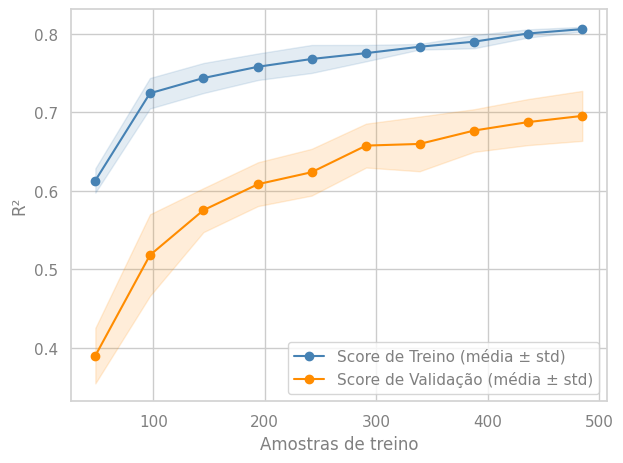

In [43]:
base_params = {
    'n_estimators': 200,      # número de árvores (aumentar para mais estabilidade)
    'max_depth': 10,          # profundidade máxima de cada árvore
    'min_samples_leaf': 3,    # restrição para folhas (regularização)
    'min_samples_split': 4,   # restrição para nós internos
    'max_features': 'sqrt',   # cada divisão olha sqrt(n_features) atributos
}


rf = RandomForestRegressor(
    **base_params,
    n_jobs=-1,
    random_state=42
    )


# Porcentagens do tamanho do dataset que queremos usar para treino
train_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100% do conjunto de dados


# Retorna arrays: train_sizes_abs, scores_de_treino, scores_de_cv
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="r2",
    shuffle=True,       # embaralhar antes de dividir (recomendado)
    random_state=42,
    n_jobs=-1
)


# Para cada tamanho de treino, temos 5 scores (por causa do cv=5)
# Vamos tirar média e desvio.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)


# Curva de treino
plt.fill_between(
    train_sizes_abs,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.15,
    color="steelblue"
)
plt.plot(
    train_sizes_abs,
    train_scores_mean,
    'o-',
    color="steelblue",
    label="Score de Treino (média ± std)"
)

# Curva de validação
plt.fill_between(
    train_sizes_abs,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.15,
    color="darkorange"
)

plt.plot(
    train_sizes_abs,
    test_scores_mean,
    'o-',
    color="darkorange",
    label="Score de Validação (média ± std)"
)

plt.xlabel("Amostras de treino")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout();

<br></br>
2\) Validation Curve

In [44]:
from sklearn.model_selection import validation_curve

In [45]:
# Hiperparâmetros e seus ranges
hyperparams = [
    ('max_depth', np.arange(8, 30, 2)),
    ('min_samples_leaf', np.arange(2, 12, 2)),
    ('min_samples_split', np.arange(2, 14, 2))
    ]

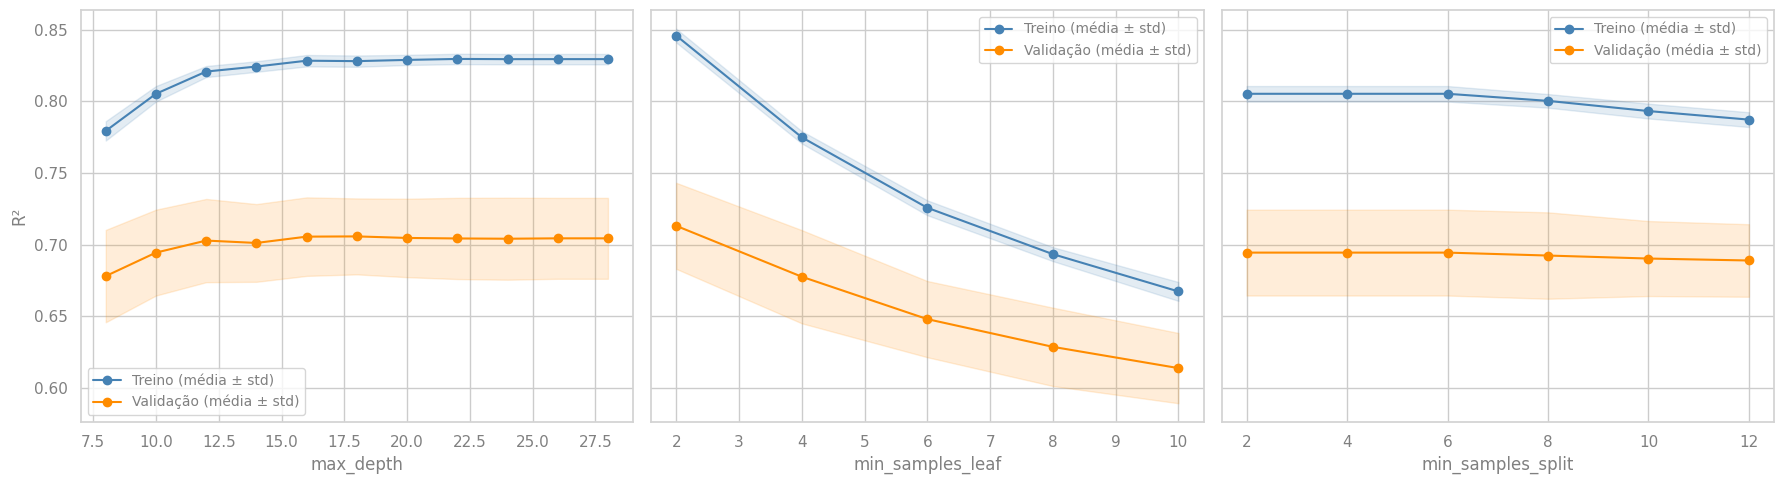

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for ax, (param_name, param_range) in zip(axes, hyperparams):
    value = base_params[param_name]
    del base_params[param_name]

    # Instancia o RandomForest sem o hiperparâmetro em questão
    rf = RandomForestRegressor(
        **base_params,
        random_state=42,
        n_jobs=-1
    )

    base_params[param_name] = value

    # Calcula a validation curve para o hiperparâmetro atual
    train_scores, val_scores = validation_curve(
        estimator=rf,
        X=X_train,
        y=y_train,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring="r2",
        n_jobs=-1,
        verbose=0
    )

    # Calcula média e desvio-padrão
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # Plot no eixo correspondente
    ax.fill_between(
        param_range,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.15,
        color="steelblue"
    )
    ax.plot(
        param_range,
        train_mean,
        'o-',
        color="steelblue",
        label="Treino (média ± std)"
    )
    ax.fill_between(
        param_range,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.15,
        color="darkorange"
    )
    ax.plot(
        param_range,
        val_mean,
        'o-',
        color="darkorange",
        label="Validação (média ± std)"
    )

    #ax.set_title(f"{param_name}")
    ax.set_xlabel(param_name)
    ax.grid(True)
    ax.legend(loc="best", fontsize='small')

# Apenas o primeiro gráfico recebe o ylabel para não ficar repetitivo
axes[0].set_ylabel("R²")

plt.tight_layout();

<br></br>
3\) Ajuste

In [47]:
# # No Colab, utilize o comando Ctrl + A para marcar tudo e Ctrl + ? para "descomentar"
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# param_dist = {
#     'n_estimators': randint(100, 400),
#     'max_depth': np.arange(12, 22, 2),
#     'min_samples_leaf': [2, 3],
#     'min_samples_split': np.arange(4, 10, 2),
#     'max_features': ['sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     scoring='r2',
#     n_iter=50,
#     cv=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
#     )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_

# best_params

## Random Forest Regressor

In [48]:
best_params = {
    'max_depth': 18,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 6,
    'n_estimators': 132
    }

In [49]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=132, n_jobs=-1,
                      random_state=42)

## Evaluation

### Interpretação  
Relacionamento das variáveis X em relação a y.

1\) Feature importance  
Indica quanto cada variável contribuiu, em média, para melhorar as divisões das árvores.

In [50]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

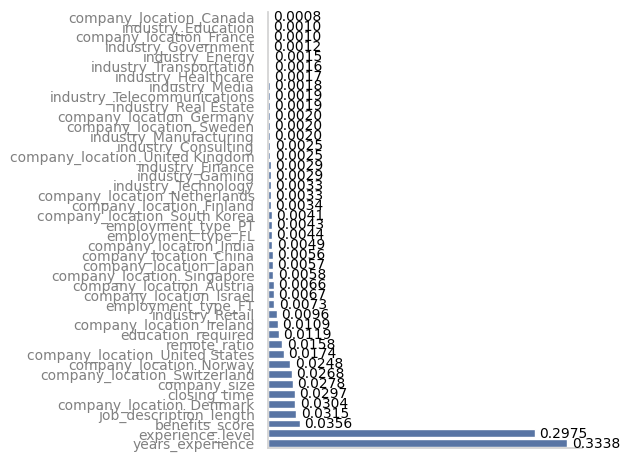

In [51]:
ax = sns.barplot(x=importances.values, y=importances.index)
plt.grid(False)
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('')
plt.yticks(fontsize=10)

# Valor nas barras
for i, v in enumerate(importances.values):
    plt.text(v + 0.005, i, f'{v:.4f}', ha='left', va='center', fontsize=10,
             color='black')

plt.tight_layout();

<br></br>
2\) Permutational Feature Importance  
Calcula redução média no score (ex.: no R²) ao permutar cada variável.

In [52]:
from sklearn.inspection import permutation_importance

In [53]:
perm_imp = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                  random_state=42)

In [54]:
perm_series = pd.Series(perm_imp.importances_mean, index=X_test.columns)

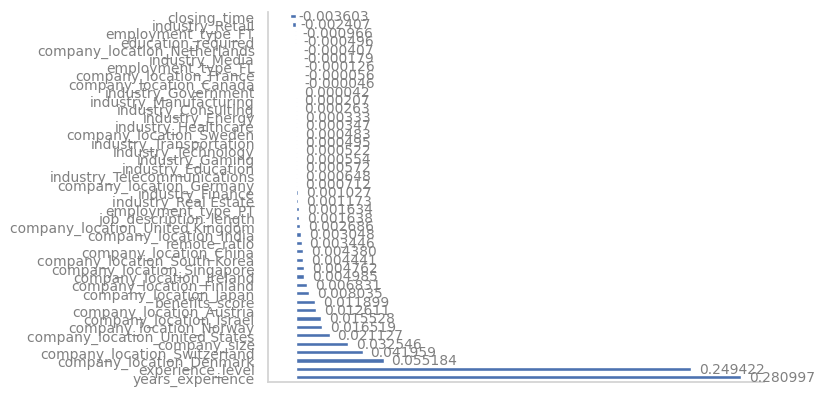

In [55]:
bars = perm_series.sort_values(ascending=False).plot.barh()

# Adicionar o valor ao lado de cada barra
for bar in bars.patches:
    bars.text(bar.get_width() + 0.005,  # Posição x do texto (um pouco à direita da barra)
              bar.get_y() + bar.get_height() / 2,  # Posição y do texto (centro vertical da barra)
              f'{bar.get_width():.6f}',  # Texto a ser exibido (formata para 4 casas decimais)
              va='center', # Alinhamento vertical
              fontsize=10)

plt.grid(False)
bars.spines['right'].set_visible(False)
bars.spines['top'].set_visible(False)
plt.yticks(fontsize=10)
# Desativar o eixo x
plt.gca().axes.get_xaxis().set_visible(False);

<br></br>
3\) SHAP (SHapley Additive exPlanations)  
Permite uma interpretação mais "justa" da contribuição de cada variável em cada previsão individual.

In [56]:
import shap

In [57]:
explainer = shap.TreeExplainer(rf)

In [58]:
shap_values = explainer.shap_values(X_test)

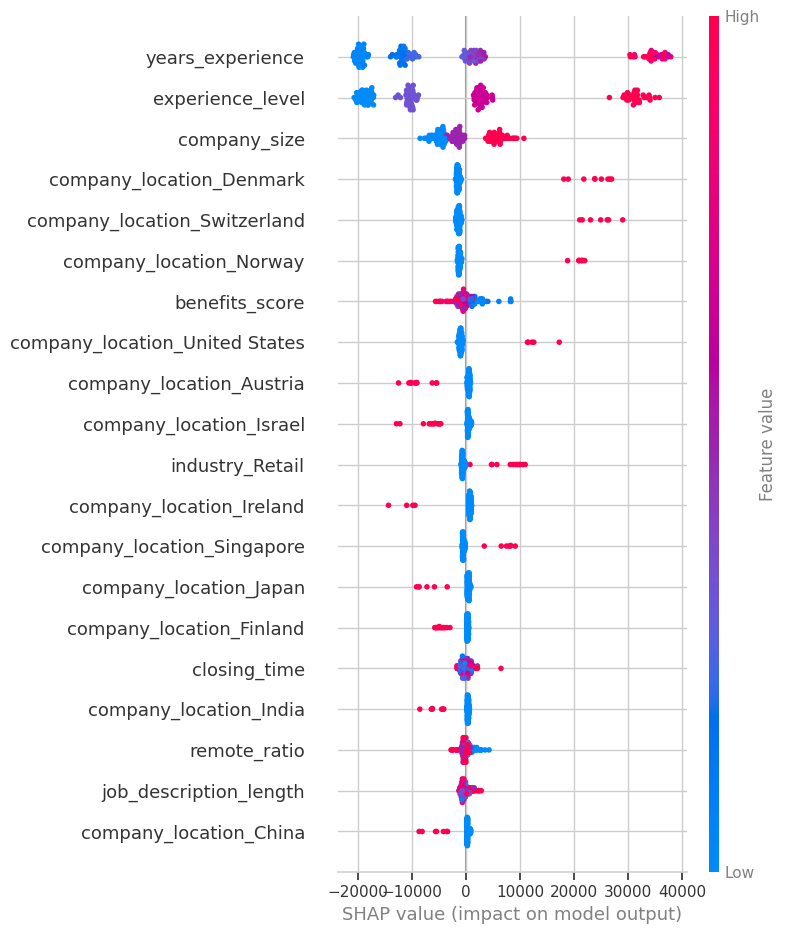

In [59]:
shap.summary_plot(shap_values, X_test)

<br></br>
4\) Partial Dependence Plot (PDP)  
Mostra o efeito médio de uma feature sobre a predição do modelo, mantendo as outras features "fixas".

In [60]:
from sklearn.inspection import PartialDependenceDisplay

In [61]:
cols_pdp = ['years_experience', 'experience_level', 'benefits_score', 'job_description_length']

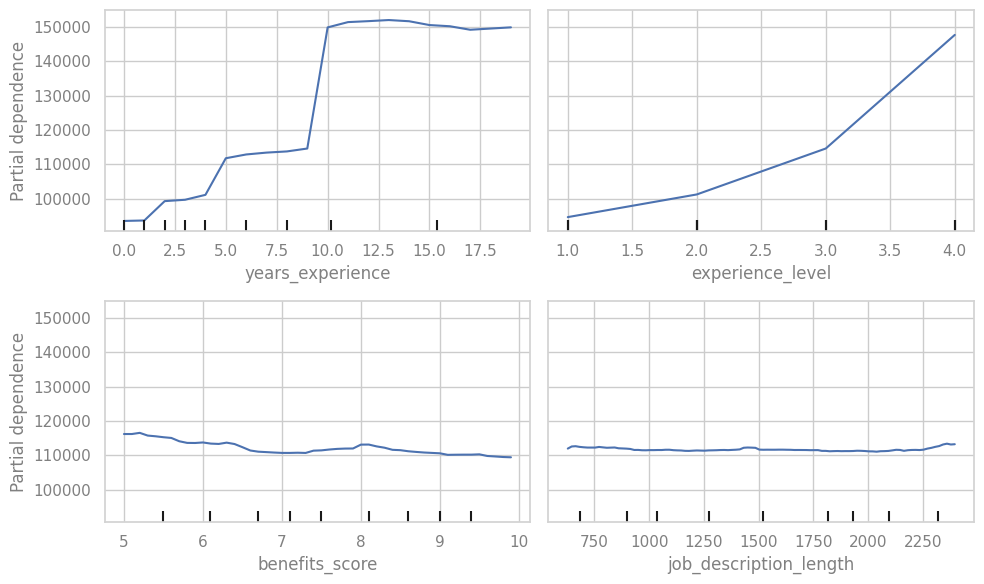

In [62]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# desenha os 4 PDPs no mesmo figure, usando a grade 2×2
PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=cols_pdp,
    ax=axs,               # recebe matriz 2×2 de axes
    )

plt.tight_layout()

<br></br>
### Performance Metrics
Demonstram o desempenho do modelo.

1\) Coefficient of Determination (R<sup>2</sup>)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.dummy import DummyRegressor

In [64]:
y_pred = rf.predict(X_test)

In [65]:
r2_score(y_test, y_pred)

0.7375592016348721

<br></br>
2\) Root Mean Squared Error (RMSE)

In [66]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

30997.834647307605


<br></br>
3\) Mean Absolute Error (MAE)

In [67]:
mean_absolute_error(y_test, y_pred)

21935.89634447387

<br></br>
4\) Baseline Model: Dummy Regressor (Mean Strategy)

In [68]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

DummyRegressor()

In [69]:
# R² do dummy
dummy.score(X_test, y_test)

-0.0024344502523436784

### Residuals

1\) Residuals vs Predicted Values

In [70]:
residuals = y_test - y_pred

In [71]:
df_residuals = pd.DataFrame({
    'salary_real': y_test,
    'salary_pred': y_pred,
    'residual': residuals
    })

In [72]:
predicteds = df_residuals.salary_pred

resid = df_residuals['residual']

In [73]:
figure = lambda w, h: plt.figure(figsize=(w, h))

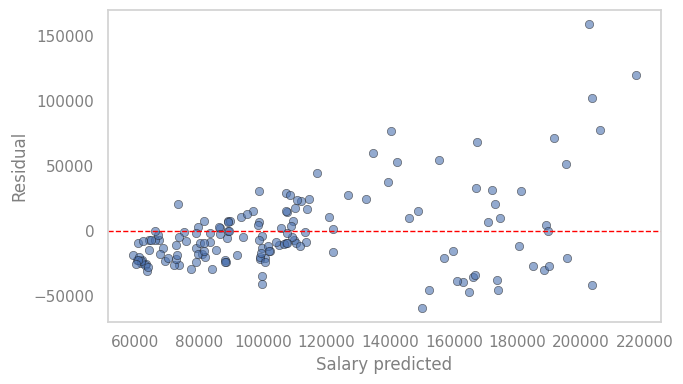

In [74]:
figure(7, 4)

plt.scatter(predicteds, resid, alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Salary predicted')
plt.ylabel('Residual')
plt.grid(False)
plt.tight_layout();

<br></br>
2\) Absolute errors

In [75]:
df_residuals['abs_residual'] = df_residuals['residual'].abs()

In [76]:
# Top 5 maiores resíduos
df_residuals.sort_values(by='abs_residual', ascending=False).head()

,salary_real,salary_pred,residual,abs_residual
1415,361541,202464.549018,159076.450982,159076.450982
4304,336904,217285.479671,119618.520329,119618.520329
7071,305527,203426.828045,102100.171955,102100.171955
1734,284013,206034.159267,77978.840733,77978.840733
10147,217159,140216.049411,76942.950589,76942.950589


3\) Residuals Distribution

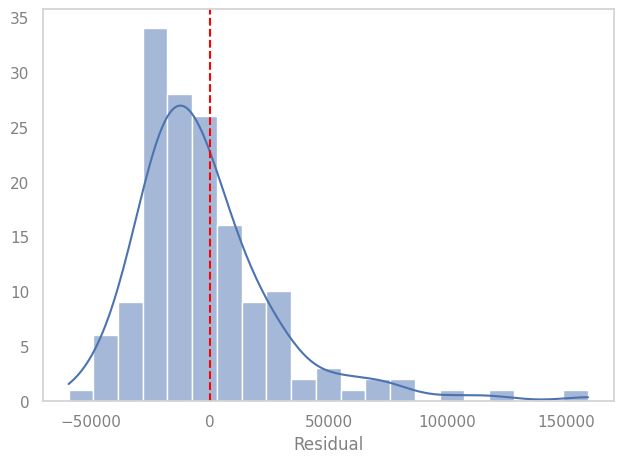

In [77]:
sns.histplot(resid, kde=True)
plt.xlabel('Residual')
plt.ylabel('')
plt.grid(False)
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout();

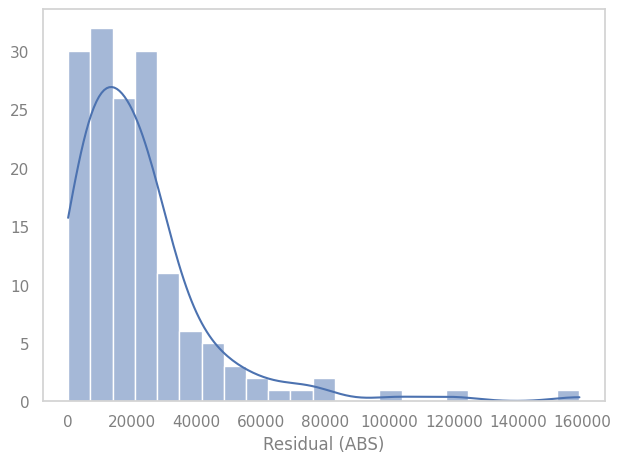

In [78]:
sns.histplot(df_residuals['abs_residual'], kde=True)
plt.ylabel('')
plt.xlabel('Residual (ABS)')
plt.grid(False)
plt.tight_layout();

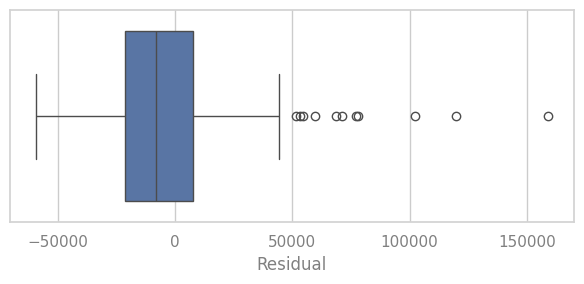

In [79]:
figure(6, 3)
sns.boxplot(x=resid)
plt.xlabel('Residual')
plt.tight_layout();

<br></br>
### Cross-Validation

In [80]:
from sklearn.model_selection import KFold, cross_val_score

In [81]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

In [82]:
# Definir o número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [83]:
scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

In [84]:
for i, j in enumerate(scores):
    print(f'Fold {i+1}: {j}')
    if i == 4:
        print(f'Média:  {scores.mean()}')

Fold 1: 0.7448525913626756
Fold 2: 0.7148306470246157
Fold 3: 0.7323550826715917
Fold 4: 0.6954394919588102
Fold 5: 0.7435418330992218
Média:  0.726203929223383


In [85]:
scores.std()

np.float64(0.01877239647629122)

# NATURAL LANGUAGE PROCESSING (NLP)

## Preprocessing

In [86]:
from sentence_transformers import SentenceTransformer
import re

In [87]:
def clean_skills(skills_str):
    return [skill.strip().lower() for skill in skills_str.split(',')]

In [88]:
# 1) Dicionário de sinônimos e a função clean_skills
SYNONYMS = {
    'js': 'javascript',
    'py': 'python',
    'csharp': 'c#',
    'cpp': 'c++',
    'c-sharp': 'c#'
    }

def clean_skills(skills_str: str) -> list[str]:
    cleaned = []
    for raw in skills_str.split(','):
        s = raw.strip().lower()
        s = re.sub(r'[^a-z0-9\s\+\#\.]', '', s)
        s = SYNONYMS.get(s, s)
        if s and s not in cleaned:
            cleaned.append(s)
    return cleaned

In [89]:
df_nlp = df_encoded.copy()[df_encoded.job_title == 'Data Analyst']

In [90]:
# 2) Aplicação ao DataFrame
df_nlp['skills_list'] = df_nlp.required_skills.apply(clean_skills)

df_nlp.head(1)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,closing_time,skills_list
8,AI00009,Data Analyst,160710,USD,3,CT,Singapore,3,Singapore,0,"Hadoop, Git, Mathematics, Python",4,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc,20,"[hadoop, git, mathematics, python]"


## Semantic Analysis

1\) Sentence Embeddings  
Conversão de conjuntos de skills em representações vetoriais densas usando modelos transformer pré-treinados, capturando relacionamentos semânticos e similaridades contextuais entre diferentes combinações de habilidades.

In [91]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter

In [92]:
# 1) Carregue um modelo pré-treinado
standard_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [93]:
# 2) Concatene as skills de cada vaga numa única frase
docs = df_nlp['skills_list'].apply(lambda s: ' | '.join(s)).tolist()

In [94]:
# 3) Gere os embeddings (array de shape [n_vagas, 384])
embeddings = standard_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2\) Dimensionality Reduction  
Aplicação de Análise de Componentes Principais (PCA) para reduzir vetores de embedding de alta dimensionalidade para espaço de menor dimensão, permitindo visualização e eficiência computacional mantendo a variância essencial.

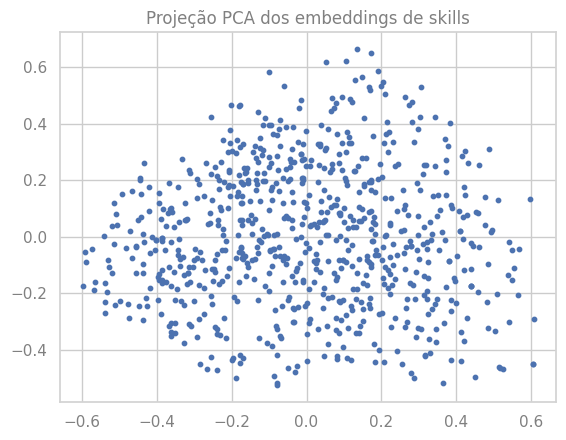

In [95]:
pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings)

plt.scatter(proj[:,0], proj[:,1], s=10)
plt.title("Projeção PCA dos embeddings de skills");

3\) Clustering  
Agrupamento não supervisionado de conjuntos de skills baseado em similaridade semântica usando algoritmo K-means, identificando clusters naturais de habilidades que frequentemente aparecem juntas em contextos similares.

In [96]:
# Defina número de clusters (k)
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Adicione rótulo de cluster ao DataFrame
df_nlp['skill_cluster'] = labels

In [97]:
df_nlp['skill_cluster'].value_counts()

,count
skill_cluster,
1,140
7,111
4,107
3,100
6,90
2,82
5,73
0,56


In [98]:
for cluster in sorted(df_nlp['skill_cluster'].unique()):
    # Join the list of skills into a single string for each row before concatenating
    skills = df_nlp[df_nlp['skill_cluster']==cluster]['skills_list'].apply(lambda x: ','.join(x)).str.cat(sep=',')
    top5 = Counter(clean_skills(skills)).most_common(5)
    print(f"Cluster {cluster}: {top5}")

Cluster 0: [('linux', 1), ('python', 1), ('nlp', 1), ('sql', 1), ('mlops', 1)]
Cluster 1: [('mathematics', 1), ('kubernetes', 1), ('tensorflow', 1), ('tableau', 1), ('pytorch', 1)]
Cluster 2: [('java', 1), ('azure', 1), ('tableau', 1), ('python', 1), ('pytorch', 1)]
Cluster 3: [('spark', 1), ('mathematics', 1), ('pytorch', 1), ('sql', 1), ('tensorflow', 1)]
Cluster 4: [('hadoop', 1), ('git', 1), ('mathematics', 1), ('python', 1), ('tensorflow', 1)]
Cluster 5: [('r', 1), ('sql', 1), ('data visualization', 1), ('python', 1), ('mathematics', 1)]
Cluster 6: [('r', 1), ('java', 1), ('python', 1), ('sql', 1), ('tensorflow', 1)]
Cluster 7: [('pytorch', 1), ('sql', 1), ('mlops', 1), ('aws', 1), ('tensorflow', 1)]


## Graph Analysis

1\) Co-occurrence Graph Construction  
Criação de um grafo não direcionado ponderado onde "nós" representam skills individuais e arestas representam frequência de co-ocorrência em vagas de emprego, modelando os relacionamentos estruturais entre habilidades.

In [99]:
from itertools import combinations
import networkx as nx

In [100]:
# 1.1) Contar co‑ocorrências
edge_counter = Counter()

In [101]:
for skills in df_nlp['skills_list']:
    # Para cada par de skills numa mesma vaga
    for s1, s2 in combinations(sorted(set(skills)), 2):
        edge_counter[(s1, s2)] += 1

In [102]:
# 1.2) Criar o grafo
G = nx.Graph()
# Adiciona arestas com peso = número de co‑ocorrências
for (s1, s2), w in edge_counter.items():
    G.add_edge(s1, s2, weight=w)

# Adicionar nós isolados para skills que aparecem sozinhas:
for skill in set(sum(df_nlp['skills_list'].tolist(), [])):
    if skill not in G:
        G.add_node(skill)

2\. Centrality Metrics  
Computação de métricas de centralidade de rede incluindo centralidade de grau (conectividade) e centralidade de intermediação (importância de ponte) para identificar as skills mais influentes e estruturalmente importantes na rede.

In [103]:
# 2.1) Degree centrality (normalizada entre 0 e 1)
deg_cent = nx.degree_centrality(G)

# 2.2) Betweenness centrality
btw_cent = nx.betweenness_centrality(G, weight='weight', normalized=True)

# 2.3) Obter top‐5 de cada
top5_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
top5_btw = sorted(btw_cent.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 por Degree Centrality:")
for skill, val in top5_deg:
    print(f"  {skill}: {val:.3f}")

print("\nTop 5 por Betweenness Centrality:")
for skill, val in top5_btw:
    print(f"  {skill}: {val:.3f}")

Top 5 por Degree Centrality:
  git: 1.000
  hadoop: 1.000
  mathematics: 1.000
  python: 1.000
  kubernetes: 1.000

Top 5 por Betweenness Centrality:
  statistics: 0.064
  spark: 0.055
  pytorch: 0.045
  aws: 0.036
  mathematics: 0.021


3\) Network Visualization  
Representação gráfica da rede de co-ocorrência de skills com tamanhos de nós proporcionais aos scores de centralidade e pesos de arestas representando força de co-ocorrência, fornecendo insights intuitivos sobre relacionamentos entre habilidades.

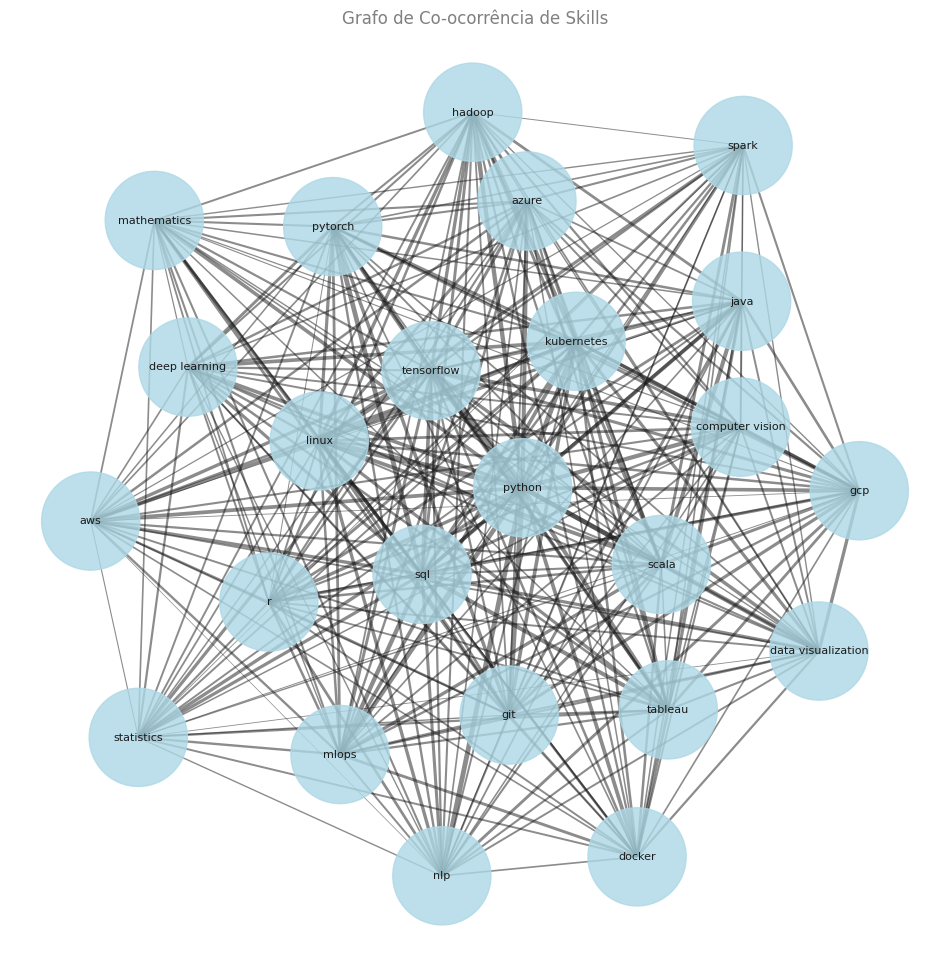

In [104]:
figure(12, 12)

pos = nx.spring_layout(G, k=0.3)  # layout

# desenha nós com tamanho proporcional à degree
node_sizes = [5000 * deg_cent[n] for n in G]
nx.draw_networkx_nodes(G, pos,
                       node_size=node_sizes,
                       node_color='lightblue',
                       alpha=0.8)

# desenha arestas com largura proporcional ao peso
edge_widths = [G[u][v]['weight']*0.1 for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)

# rótulos
nx.draw_networkx_labels(G, pos, font_size=8)
plt.axis('off')
plt.title("Grafo de Co-ocorrência de Skills");